In [14]:
using LinearAlgebra
using Plots
using LaTeXStrings

In [2]:
function QuanWal_ring(n::Int64,P::Int64,ϕ::Vector{ComplexF64},H::Matrix{Float64})  
     #numero de nodos es P

    kb=[[1,0],[0,1]] #BASE USUAL en un vector de vectores que contenga cada uno

    A=Array{Vector{ComplexF64}}(undef, P) #Numero de qbits
    B=Array{Vector{ComplexF64}}(undef, P)
    @inbounds for i=1:P
        A[i]=[0,0]
        B[i]=[0,0]
    end;
    
    if P%2==0
        A[Int64(P/2)]=ϕ #si es par colocarlo cerca de en medio
    else
        A[Int64((P-1)/2 +1)]=ϕ
    end
    
    for k=0:n

        if k%2!=0

            for i=1:P   #Como empezamos desde un punto arbitrario podemos revisar todas las posiciones de una vez

                if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im]  #Si la proyección |L><L|H|phi> es diferente de 0
                    if i-1<1
                        B[P]=B[P]+kb[1]*transpose(kb[1])*(H*A[i])
                    else
                        B[i-1]=B[i-1]+kb[1]*transpose(kb[1])*(H*A[i])    #entonces en B escribira el nuevo qbit H|phi> en la posición n-1=4-1=3
                    end
                end                                                  #Sumandola a la anterior que estaba allí

                if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |R><R|H|phi> es diferente de 0
                    if i+1>P
                        B[1]=B[1]+kb[2]*transpose(kb[2])*(H*A[i])
                    else
                        B[i+1]=B[i+1]+kb[2]*transpose(kb[2])*(H*A[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1=4+1=5
                    end
                end                                                 #Sumandola a la anterior que estaba allí
            end
            for i=1:P
                A[i]=[0,0]                                      #Por último se reescribe A para que quede en ceros [0,0]
            end

        else

            for i=1:P   #Como empezamos desde un punto arbitrario podemos revisar todas las posiciones de una vez
                if kb[1]*transpose(kb[1])*(H*B[i]) != [0+0im,0+0im]  #Si la proyección |L><L|H|phi> es diferente de 0
                    #println("hola2")
                    if i-1<1
                        A[P]=A[P]+kb[1]*transpose(kb[1])*(H*B[i])
                    else
                        A[i-1]=A[i-1]+kb[1]*transpose(kb[1])*(H*B[i])    #entonces en B escribira el nuevo qbit H|phi> en la posición n-1=4-1=3
                        #println("hola3")
                    end
                end                                                  #Sumandola a la anterior que estaba allí

                if kb[2]*transpose(kb[2])*(H*B[i]) != [0+0im,0+0im] #Si la proyección |R><R|H|phi> es diferente de 0
                    if i+1>P
                        A[1]=A[1]+kb[2]*transpose(kb[2])*(H*B[i])
                    else
                        A[i+1]=A[i+1]+kb[2]*transpose(kb[2])*(H*B[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1=4+1=5
                    end
                end                                                 #Sumandola a la anterior que estaba allí
            end
            for i=1:P
                B[i]=[0,0]                                      #Por último se reescribe A para que quede en ceros [0,0]
            end
        end

    end
    if n%2==0
        return A
    else
        return B
    end
end

QuanWal_ring (generic function with 1 method)

In [45]:
n=1000  #Numerp de pasos
P=101 #Numero de nodos
ϕ=1/sqrt(2)*[1, 1*im]
#ϕ=1.0/sqrt(2)*[1*im,1*im]
H=1/sqrt(2)*[1 1; 1 -1];


In [46]:
@time G=QuanWal_ring(n,P,ϕ,H);


  0.146480 seconds (1.78 M allocations: 188.475 MiB, 30.20% gc time)


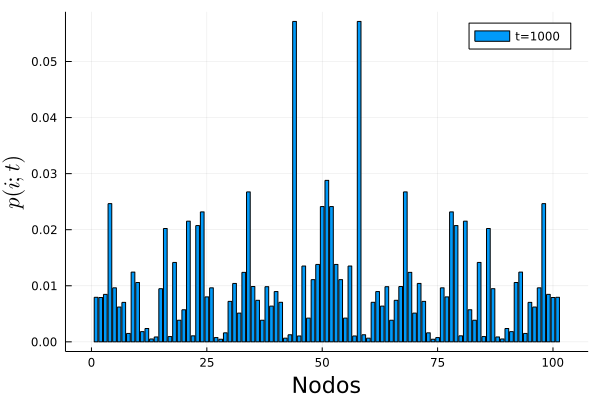

In [49]:
fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels

bar(1:1:P,norm.(G).^2,guidefont=fnt,ylabel=L"p(i;t)",xlabel="Nodos",label="t=1000")

In [38]:
P=101
stp=1
paso=500

500

 40.707488 seconds (345.49 M allocations: 24.305 GiB, 10.32% gc time, 0.16% compilation time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\Maestria\QW\QW_ring_real(1_2).gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\CoJwR\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\Maestria\\QW\\QW_ring_real(1_2).gif")
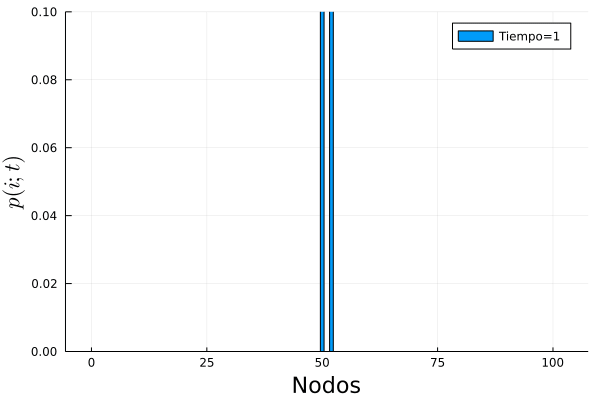

In [50]:
@time begin
    anim= @animate for l=1:stp:paso
        G=G=QuanWal_ring(l,P,ϕ,H)
        bar(1:1:P,norm.(G).^2,ylims=(0,0.1),label="Tiempo=$(l)",guidefont=fnt,ylabel=L"p(i;t)",xlabel="Nodos")
    end
    gif(anim,"./QW_ring_real(1_2).gif", fps=30)
end

In [53]:
fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels
n=1000  #Numerp de pasos
P=101 #Numero de nodos
### Entropia Neuman con S/Kb
Sn=zeros(n)

for j=1:n
    G=QuanWal_ring(j,P,ϕ,H)
    Dst=zeros(ComplexF64,2,2)
    pos=length(G)
    for i=1:pos
        Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
        Dst[1,2]+=G[i][1]*conj(G[i][2])
        Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
        Dst[2,1]+=conj(G[i][1])*G[i][2]
    end
    lamb=eigvals(Dst)
    Sn[j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
end


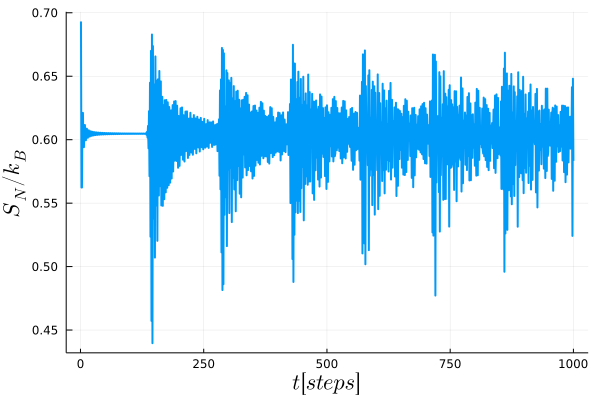

In [54]:
plot(Sn,ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=false,
    guidefont=fnt,legend=:bottomright,
    legendfontsize=12.0,lw = 2)